In [64]:
from sklearn.datasets import load_boston   #loading the in-library dataset
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler          #basic scaler for the model[x]
from sklearn.pipeline import Pipeline                     #to chain processing steps after eachother
from sklearn.model_selection import GridSearchCV          #cross validation of a pipeline and a settings grid
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

x, y = load_boston(return_X_y=True)      # return_X_y=True is a special parameter used to produce 2 arrays

In [65]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [66]:
#just a quick peak at the data with pandas

import pandas as pd

xframe = pd.DataFrame(x)
yframe = pd.DataFrame(y)

xframe

0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  
1    396.90  9.14  
2    392.83  4.03  
3    394.63  2.94  
4    396.90  5.33  
..      ...   ...  
501  391.99  9.67  
502  396.90  9.08  
503  396.90  5.64  
504  393.45  6.48  
505  396.90  7.88  

[506 rows x 13 columns]

In [67]:
#mod = KNeighborsRegressor()       #call the model
#mod.fit(x, y)                     #fit x and y in the model

pipe = Pipeline([                      #create a pipeline that scales x then runs the model
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])

#pipe.fit(x, y)          #fit new scaled parameter in the pipe model
#pipe.get_params()       # to get all the paramiters inside estimators

In [68]:
# set the estimator as pipe, set the settings grid as n_neighbors list
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                   cv = 3)

In [69]:
mod.fit(x,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [70]:
pd.DataFrame(mod.cv_results_)      #dataframing the cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002697      0.000645         0.002401        0.001761   
1       0.004018      0.002862         0.000000        0.000000   
2       0.003090      0.003566         0.000000        0.000000   
3       0.001251      0.001769         0.006280        0.006836   
4       0.005649      0.007989         0.000000        0.000000   
5       0.000683      0.000965         0.002578        0.003646   
6       0.000000      0.000000         0.005208        0.007365   
7       0.010412      0.007362         0.000000        0.000000   
8       0.005205      0.007362         0.005209        0.007366   
9       0.000350      0.000495         0.005261        0.007440   

  param_model__n_neighbors                      params  split0_test_score  \
0                        1   {'model__n_neighbors': 1}           0.226933   
1                        2   {'model__n_neighbors': 2}           0.358216   
2                        3   {'model__n_neighbors': 3}           0.413515   
3                        4   {'model__n_neighbors': 4}           0.475349   
4                        5   {'model__n_neighbors': 5}           0.512318   
5                        6   {'model__n_neighbors': 6}           0.533611   
6                        7   {'model__n_neighbors': 7}           0.544782   
7                        8   {'model__n_neighbors': 8}           0.589644   
8                        9   {'model__n_neighbors': 9}           0.590352   
9                       10  {'model__n_neighbors': 10}           0.616510   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.432998           0.127635         0.262522        0.127179   
1           0.409229           0.172294         0.313246        0.101821   
2           0.476651           0.318534         0.402900        0.064986   
3           0.402495           0.273014         0.383619        0.083675   
4           0.347951           0.262590         0.374286        0.103638   
5           0.389504           0.248482         0.390532        0.116406   
6           0.385199           0.243668         0.391216        0.123003   
7           0.394650           0.209714         0.398003        0.155124   
8           0.407556           0.185253         0.394387        0.165643   
9           0.395077           0.164023         0.391870        0.184741   

   rank_test_score  
0               10  
1                9  
2                1  
3                7  
4                8  
5                6  
6                5  
7                2  
8                3  
9                4

In [71]:
pred = mod.predict(x)         #pred is a ndarray containing the predictions

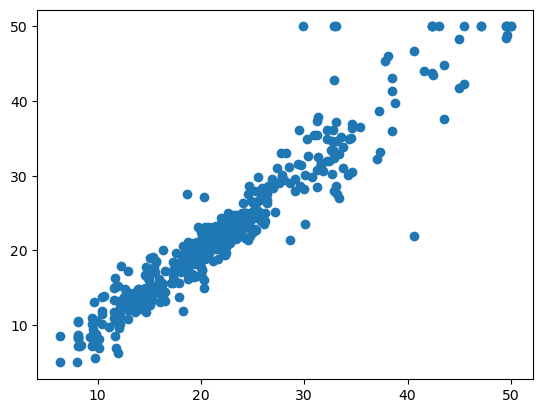

In [72]:
plt.scatter(pred, y)         # plot a scatter graph with coord(x=pred,y=y)